In [264]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
%matplotlib inline

In [265]:
df=pd.read_csv('D://DATASETS//SupermarketPurchase.csv')

In [266]:
df.head()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
0,1,300.000000,1200.00,4,0.00,11
1,2,2563.282500,41012.52,16,78737.48,2
2,4,3510.000000,7020.00,2,780.00,4
3,8,4530.000000,13590.00,3,1510.00,1
4,9,2428.076923,33455.00,15,17445.00,6


In [267]:
df.rename(columns={'AVG_Actual_price_12':'Avg_MRP',
                         'Purchase_Value':'Purchase_amount',
                         'No_of_Items':'Items_Qty',
                         'MONTH_SINCE_LAST_TRANSACTION':'TRANSACTION_MONTH'},inplace=True)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Cust_id              702 non-null int64
Avg_MRP              702 non-null float64
Purchase_amount      702 non-null float64
Items_Qty            702 non-null int64
Total_Discount       702 non-null float64
TRANSACTION_MONTH    702 non-null int64
dtypes: float64(3), int64(3)
memory usage: 33.0 KB


In [269]:
df.isnull().sum()

Cust_id              0
Avg_MRP              0
Purchase_amount      0
Items_Qty            0
Total_Discount       0
TRANSACTION_MONTH    0
dtype: int64

In [270]:
df['Total_Discount'].sort_values()

240     -3962.48
77      -2495.64
33      -1411.80
421     -1172.16
417      -962.37
         ...    
275    406350.00
274    441726.76
32     524174.00
497    536197.00
691    734349.82
Name: Total_Discount, Length: 702, dtype: float64

In [271]:
df['Total_Discount'] = df['Total_Discount'].apply(lambda x: x if x>=0 else x*(-1))
df['Total_Discount']

0          0.00
1      78737.48
2        780.00
3       1510.00
4      17445.00
         ...   
697    11960.00
698        0.00
699      605.91
700     3750.00
701     4150.00
Name: Total_Discount, Length: 702, dtype: float64

In [272]:
df.describe()

,Cust_id,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,TRANSACTION_MONTH
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20846.272764,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58413.542363,3.562840
min,1.000000,22.500000,45.000000,1.000000,0.000000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2642.500000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


In [273]:
df.duplicated().sum()
df.drop_duplicates(inplace = True)

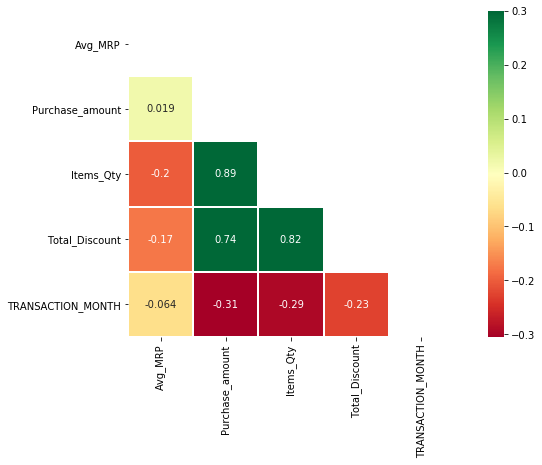

In [274]:
f, ax = plt.subplots(figsize=(12,6))
df.drop('Cust_id',axis=1, inplace=True)
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),vmax= .3, square=True, cmap="RdYlGn",linewidth=1,annot=True, mask=mask);
plt.show()

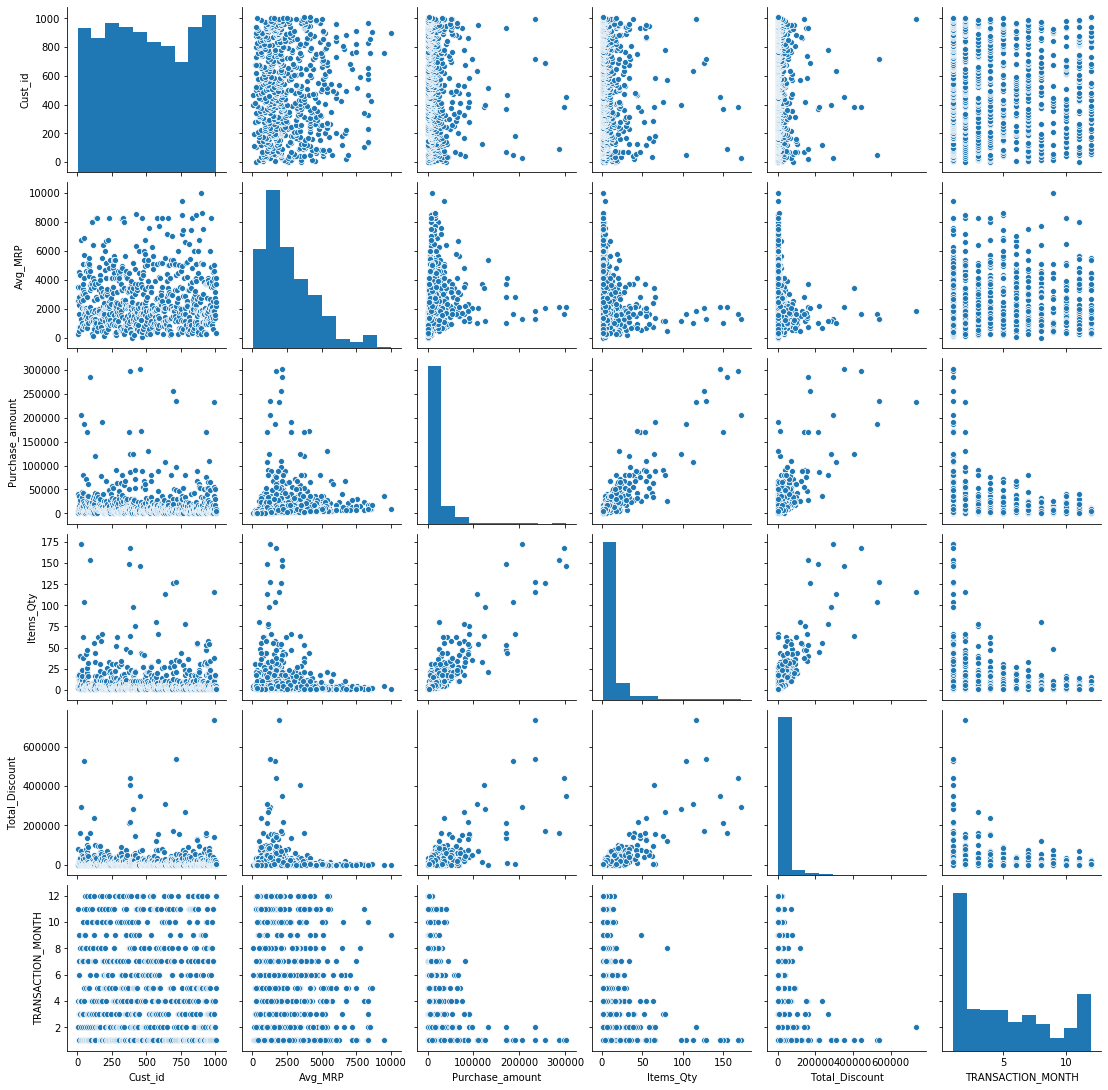

In [17]:
sns.pairplot(df)

In [275]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,1:]) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 4) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4'] 
  
X_principal.head()

,P1,P2,P3,P4
0,-0.956279,0.157868,-0.039053,0.069506
1,0.768694,0.790504,-0.192541,-0.421167
2,0.169317,-0.706507,0.032066,-0.012513
3,0.793513,-0.356157,0.092100,-0.042088
4,-0.272921,1.048856,0.539015,0.120065


In [276]:
# we get the ratio dividing the eigen value to sum of eigen value
print('Expalined variance ratio:', pca.explained_variance_ratio_) 

print(df.iloc[:,1:].columns.values.tolist())
print('Eigen values:', pca.explained_variance_)   

Expalined variance ratio: [0.5802234  0.32259482 0.07201472 0.02516705]
['Purchase_amount', 'Items_Qty', 'Total_Discount', 'TRANSACTION_MONTH']
Eigen values: [0.53372756 0.29674389 0.06624387 0.0231503 ]


[58.022 90.281 97.482 99.999]


Text(0, 0.5, 'variance')

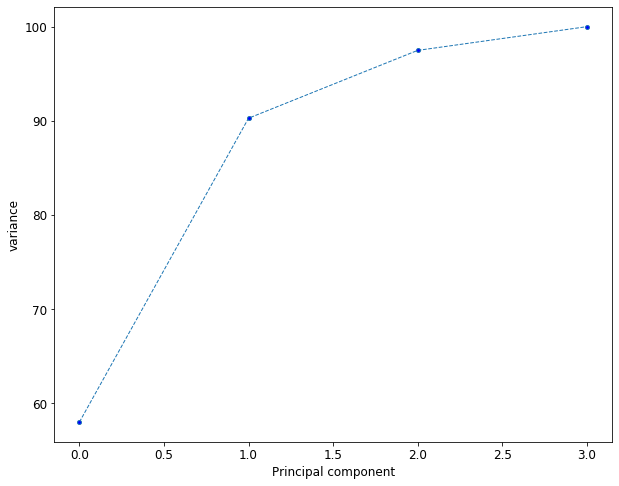

In [277]:
plt.figure(figsize=[10,8])
plt.rcParams['font.size'] = 12
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=5)*100)
print(variance_ratio_cum_sum)

plt.plot(variance_ratio_cum_sum, linestyle='dashed', linewidth = 1, 
         marker='o', markerfacecolor='blue', markersize=4)
plt.xlabel('Principal component')
plt.ylabel('variance')

In [278]:
pca.explained_variance_ratio_

array([0.5802234 , 0.32259482, 0.07201472, 0.02516705])

In [279]:
X = X_principal
X

,P1,P2,P3,P4
0,-0.956279,0.157868,-0.039053,0.069506
1,0.768694,0.790504,-0.192541,-0.421167
2,0.169317,-0.706507,0.032066,-0.012513
3,0.793513,-0.356157,0.092100,-0.042088
4,-0.272921,1.048856,0.539015,0.120065
...,...,...,...,...
697,0.809753,-0.338477,-0.090004,-0.064622
698,-0.228377,-0.681024,-0.059725,0.006198
699,-0.961692,0.179449,-0.030146,0.024009
700,-0.964397,0.199806,-0.010836,-0.022016


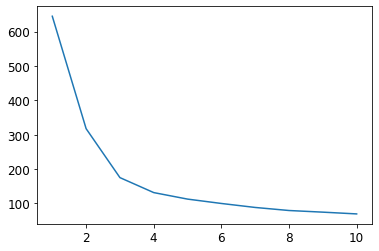

In [280]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state= None)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

In [281]:
kmeans = KMeans( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)
print(kmeans.cluster_centers_)

clusters = kmeans.fit_predict(X)
df['label']=clusters

[[-0.8596085   0.03756903  0.00267664  0.00267266]
 [ 0.48240164 -0.44578581  0.00372161 -0.00516441]
 [ 0.58882835  0.81500305 -0.01217431  0.00542356]]


In [282]:
df.head()

,Avg_MRP,Purchase_amount,Items_Qty,Total_Discount,TRANSACTION_MONTH,label
0,300.000000,1200.00,4,0.00,11,2
1,2563.282500,41012.52,16,78737.48,2,1
2,3510.000000,7020.00,2,780.00,4,0
3,4530.000000,13590.00,3,1510.00,1,0
4,2428.076923,33455.00,15,17445.00,6,1


In [283]:
X_principal

,P1,P2,P3,P4
0,-0.956279,0.157868,-0.039053,0.069506
1,0.768694,0.790504,-0.192541,-0.421167
2,0.169317,-0.706507,0.032066,-0.012513
3,0.793513,-0.356157,0.092100,-0.042088
4,-0.272921,1.048856,0.539015,0.120065
...,...,...,...,...
697,0.809753,-0.338477,-0.090004,-0.064622
698,-0.228377,-0.681024,-0.059725,0.006198
699,-0.961692,0.179449,-0.030146,0.024009
700,-0.964397,0.199806,-0.010836,-0.022016


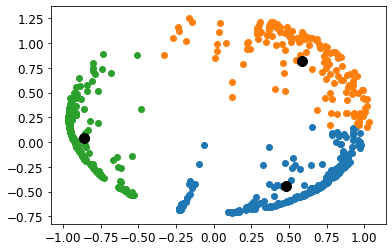

In [284]:
plt.scatter(X_principal['P1'][df.label == 0 ], X_principal['P2'][df.label == 0 ])
plt.scatter(X_principal['P1'][df.label == 1 ], X_principal['P2'][df.label == 1 ]) 
plt.scatter(X_principal['P1'][df.label == 2 ], X_principal['P2'][df.label == 2 ]) 
plt.scatter(X_principal['P1'][df.label == 3 ], X_principal['P2'][df.label == 3 ])
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "k")
plt.show()

In [285]:
normalized_df

,0,1,2,3
0,-0.294283,-0.183614,-0.195371,0.917340
1,0.417318,0.179713,0.676038,-0.580105
2,-0.508784,-0.599200,-0.472966,-0.397998
3,-0.143562,-0.307527,-0.264205,-0.902780
4,0.746440,0.404983,-0.110424,0.516355
...,...,...,...,...
697,-0.257499,-0.272447,-0.123574,-0.918802
698,-0.638757,-0.619708,-0.455891,-0.010726
699,-0.261995,-0.206503,-0.164413,0.928269
700,-0.222097,-0.232234,-0.140111,0.936541


In [286]:
kmeans.cluster_centers_

array([[ 0.48240164, -0.44578581,  0.00372161, -0.00516441],
       [ 0.58882835,  0.81500305, -0.01217431,  0.00542356],
       [-0.8596085 ,  0.03756903,  0.00267664,  0.00267266]])

In [287]:
normalized_df.corr()

,0,1,2,3
0,1.000000,0.713520,0.488371,-0.159658
1,0.713520,1.000000,0.757688,-0.145527
2,0.488371,0.757688,1.000000,-0.081793
3,-0.159658,-0.145527,-0.081793,1.000000


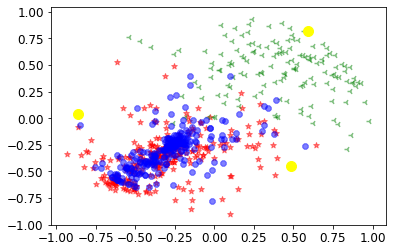

In [288]:
plt.scatter(normalized_df.iloc[:,0][df.label == 0 ],normalized_df.iloc[:,1][df.label == 0],marker = '*',color = "red",alpha=0.5)
plt.scatter(normalized_df.iloc[:,0][df.label == 1 ],normalized_df.iloc[:,1][df.label == 1],marker = '3',color = "green",alpha=0.5)
plt.scatter(normalized_df.iloc[:,0][df.label == 2 ],normalized_df.iloc[:,1][df.label == 2],marker = '8',color = "blue",alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,color = "yellow")
plt.show()